In [1]:
from src.powerspectrum import PowerSpectrum
import config as CONFIG 

import matplotlib.pylab as plt 
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [2]:
pkcalc = PowerSpectrum(CONFIG.ZMIN, CONFIG.ZMAX, CONFIG.KMIN, CONFIG.KMAX)

In [3]:
inputs = {'omega_cdm': 0.12,
         'omega_b': 0.020,
         'ln10^{10}A_s': 2.7,
         'n_s': 1.0,
         'h': 0.70,
          'M_tot': 0.05,
         'c_min': 2.15}

In [4]:
pk_lin, pk_non = pkcalc.pk_calculation(inputs, 0)

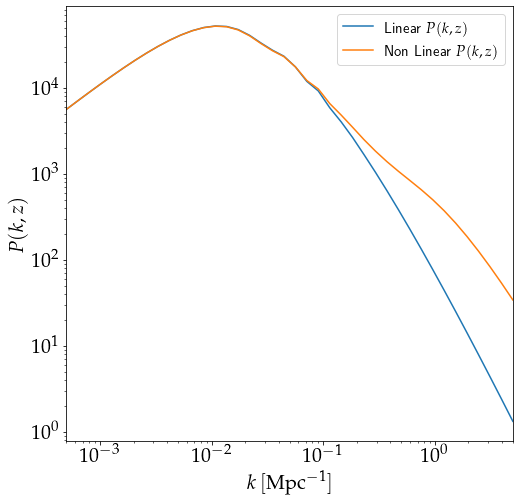

In [5]:
plt.figure(figsize = (8, 8))
plt.loglog(pkcalc.wavenumber, pk_lin, label = 'Linear $P(k,z)$')
plt.loglog(pkcalc.wavenumber, pk_non, label = 'Non Linear $P(k,z)$')
plt.xlim(pkcalc.k_min, pkcalc.k_max)
plt.ylabel(r'$P(k,z)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

# Generate the Training Points

In [1]:
from trainingpoints import calculate_power_spectrum

In [2]:
cosmo, linear, nonlinear = calculate_power_spectrum('lhs_8', 0)